In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import os

### Load and Unpickle dataframes stored in directory

In [21]:
def load_and_unpickle(class_type, directory, subdirectory):
    """
    Description:
    Loads and Unpickles a file from the supplied parameters
    
    Parameter:
    class_type (str): class type to be loaded and unpickled\n
    directory (str): directory within the CWD\n
    subdirectory (str): subdirectory within the directory specified\n
    
    Returns:
    Specified dataframe if found in the directory\n
    None if not found\n
    """
    dir_path = f"{directory}/{subdirectory}"
    filename = f'{class_type}.pkl'
    filepath = os.path.join(dir_path, filename)

    if os.path.exists(filepath):
        df = pd.read_pickle(filepath)
        print(f"Loaded from {subdirectory} for class {class_type}")
        return df
    else:
        print(f"File not found: {filepath}")
        return None

### Add Original Dataframes to their respective arrays

In [22]:
classes = ["Jump", "Run", "Walk", "Squat"]
original_directory = "Original"
clean_directory = "Clean"
training_subdirectory = "Training"
test_subdirectory = "Test"
validation_subdirectory = "Validation"

original_training_df_arr = []
for class_type in classes:
    original_training_df_arr.append(load_and_unpickle(class_type, original_directory, training_subdirectory))

original_test_df_arr = []
for class_type in classes:
    original_test_df_arr.append(load_and_unpickle(class_type, original_directory, test_subdirectory))

original_validation_df_arr = []
for class_type in classes:
    original_validation_df_arr.append(load_and_unpickle(class_type, original_directory, validation_subdirectory))

original_train_df= pd.DataFrame()

for df in original_training_df_arr:
    original_train_df = pd.concat([original_train_df, df], ignore_index=True)


Loaded from Training for class Jump
Loaded from Training for class Run
Loaded from Training for class Walk
Loaded from Training for class Squat
Loaded from Test for class Jump
Loaded from Test for class Run
Loaded from Test for class Walk
Loaded from Test for class Squat
Loaded from Validation for class Jump
Loaded from Validation for class Run
Loaded from Validation for class Walk
Loaded from Validation for class Squat


### Add Clean Dataframes to their respective arrays

In [23]:
clean_training_df_arr = []
for class_type in classes:
    clean_training_df_arr.append(load_and_unpickle(class_type, clean_directory, training_subdirectory))

clean_test_df_arr = []
for class_type in classes:
    clean_test_df_arr.append(load_and_unpickle(class_type, clean_directory, test_subdirectory))

clean_validation_df_arr = []
for class_type in classes:
    clean_validation_df_arr.append(load_and_unpickle(class_type, clean_directory, validation_subdirectory))
    
clean_train_df = pd.DataFrame()

for df in clean_training_df_arr:
    clean_train_df = pd.concat([clean_train_df, df], ignore_index=True)

Loaded from Training for class Jump
Loaded from Training for class Run
Loaded from Training for class Walk
Loaded from Training for class Squat
Loaded from Test for class Jump
Loaded from Test for class Run
Loaded from Test for class Walk
Loaded from Test for class Squat
Loaded from Validation for class Jump
Loaded from Validation for class Run
Loaded from Validation for class Walk
Loaded from Validation for class Squat


# Original Data

### Train KNN model (Original Data)

In [24]:
scaler = MinMaxScaler(feature_range=(-1, 1))
# Prepare features and labels for training
X_train = original_train_df[['ax', 'ay', 'az', 'gx', 'gy', 'gz']]  # Feature columns
y_train = original_train_df['Class']  # Label column

X_train_scaled = scaler.fit_transform(X_train)
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': list(range(1,31))}
grid_search = GridSearchCV(knn, param_grid, cv=10)
grid_search.fit(X_train_scaled, y_train)
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_
print(f"Best k (with normalization): {best_k}")
print(f"Accuracy (with normalization): {best_score}")
mean_scores_original = grid_search.cv_results_['mean_test_score']
k_values_original = grid_search.cv_results_['param_n_neighbors'].data

final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)

Best k (with normalization): 5
Accuracy (with normalization): 0.8446687861950108


KNeighborsClassifier()

### Calculate Accuracy for each test set (Original Test Data)
### Calculate confusion matrix
### Calculate Average accuracy

Test set accuracy (with normalization) for 'Jump' (Original Test Data): 0.9031187790311878
Test set accuracy (with normalization) for 'Run' (Original Test Data): 0.5476660092044707
Test set accuracy (with normalization) for 'Walk' (Original Test Data): 0.8084824387011266
Test set accuracy (with normalization) for 'Squat' (Original Test Data): 0.9409814323607427
Average Accuracy (Original Test Data): 0.800062164824382


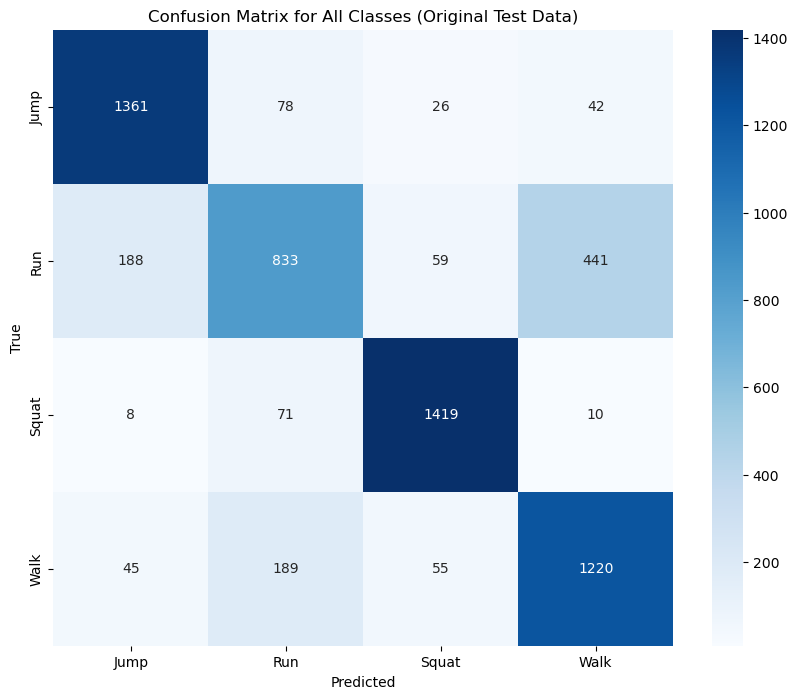

In [25]:
original_test_accuracy_total = 0
y_test_total_org_test = []
y_pred_total_org_test = []
for i in range(4):
    test_df = original_test_df_arr[i]
    X_test = test_df[['ax', 'ay', 'az', 'gx', 'gy', 'gz']]  # Feature columns
    y_test = test_df['Class']  # Label column
    X_test_scaled = scaler.transform(X_test)
    
    y_pred = final_knn.predict(X_test_scaled)
    y_test_total_org_test.extend(y_test)
    y_pred_total_org_test.extend(y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    original_test_accuracy_total = original_test_accuracy_total + accuracy
    print(f"Test set accuracy (with normalization) for '{classes[i]}' (Original Test Data): {accuracy}")
cm = confusion_matrix(y_test_total_org_test, y_pred_total_org_test)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=final_knn.classes_, yticklabels=final_knn.classes_)
plt.title('Confusion Matrix for All Classes (Original Test Data)')
plt.xlabel('Predicted')
plt.ylabel('True')
original_test_accuracy_total_avg = original_test_accuracy_total / 4
print(f"Average Accuracy (Original Test Data): {original_test_accuracy_total_avg}")

### Plot accuracy vs k-value (Original Test Data)

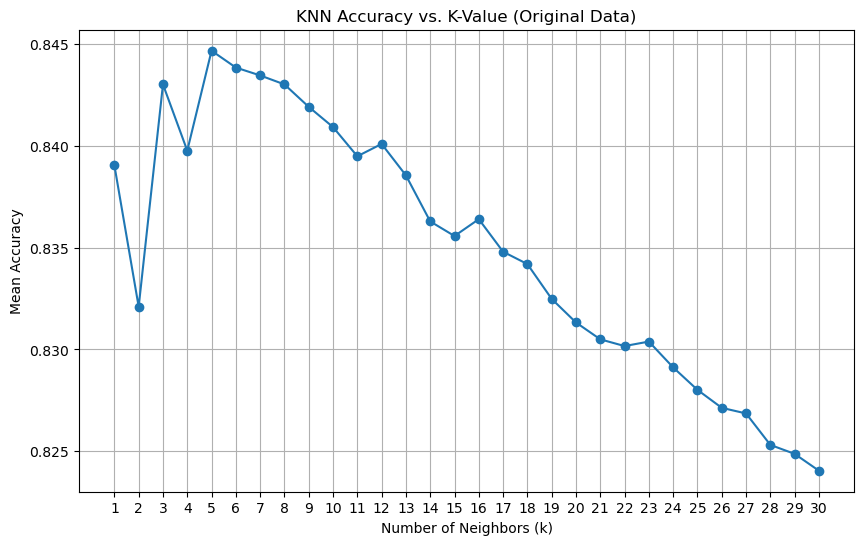

In [26]:
# Plotting the accuracy as a function of k
plt.figure(figsize=(10, 6))
plt.plot(k_values_original, mean_scores_original, marker='o')
plt.title('KNN Accuracy vs. K-Value (Original Data)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Accuracy')
plt.xticks(k_values_original)
plt.grid()
plt.show()

### Calculate Accuracy for each test set (Original Validation Data)
### Calculate confusion matrix
### Calculate Average accuracy

Test set accuracy (with normalization) for 'Jump' (Original Validation Data): 0.7725464190981433
Test set accuracy (with normalization) for 'Run' (Original Validation Data): 0.6638157894736842
Test set accuracy (with normalization) for 'Walk' (Original Validation Data): 0.852882703777336
Test set accuracy (with normalization) for 'Squat' (Original Validation Data): 0.3706896551724138
Average Accuracy (Original Validation Data): 0.6649836418803943


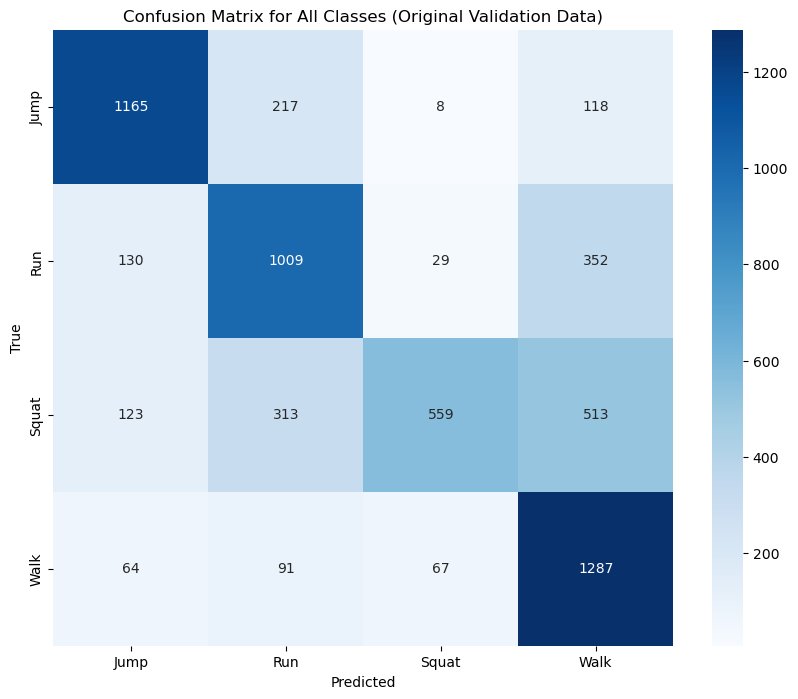

In [27]:
original_validation_accuracy = 0
y_test_total_org_validation = []
y_pred_total_org_validation = []
for i in range(4):
    validation_df = original_validation_df_arr[i]
    X_test = validation_df[['ax', 'ay', 'az', 'gx', 'gy', 'gz']]  # Feature columns
    y_test = validation_df['Class']  # Label column
    X_test_scaled = scaler.transform(X_test)
    
    y_pred = final_knn.predict(X_test_scaled)
    y_test_total_org_validation.extend(y_test)
    y_pred_total_org_validation.extend(y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    original_validation_accuracy = original_validation_accuracy + accuracy
    print(f"Test set accuracy (with normalization) for '{classes[i]}' (Original Validation Data): {accuracy}")
cm = confusion_matrix(y_test_total_org_validation, y_pred_total_org_validation)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=final_knn.classes_, yticklabels=final_knn.classes_)
plt.title('Confusion Matrix for All Classes (Original Validation Data)')
plt.xlabel('Predicted')
plt.ylabel('True')
original_validation_accuracy_avg = original_validation_accuracy / 4
print(f"Average Accuracy (Original Validation Data): {original_validation_accuracy_avg}")

# Clean Data

### Train KNN model (Clean Data)

In [28]:
# Prepare features and labels for training
X_train = clean_train_df[['ax', 'ay', 'az', 'gx', 'gy', 'gz']]  # Feature columns
y_train = clean_train_df['Class']  # Label column

X_train_scaled = scaler.transform(X_train)
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': list(range(1,31))}
grid_search = GridSearchCV(knn, param_grid, cv=10)
grid_search.fit(X_train_scaled, y_train)
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_
mean_scores_clean = grid_search.cv_results_['mean_test_score']
k_values_clean = grid_search.cv_results_['param_n_neighbors'].data
print(f"Best k (with normalization): {best_k}")
print(f"Best Accuracy (with normalization): {best_score}")
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)

Best k (with normalization): 5
Best Accuracy (with normalization): 0.8773467205083237


KNeighborsClassifier()

### Calculate Accuracy for each test set (Clean Test Data)
### Calculate confusion matrix
### Calculate Average accuracy

Test set accuracy (with normalization) for 'Jump' (Clean Test Data): 0.9188982402448355
Test set accuracy (with normalization) for 'Run' (Clean Test Data): 0.558667676003028
Test set accuracy (with normalization) for 'Walk' (Clean Test Data): 0.8495034377387318
Test set accuracy (with normalization) for 'Squat' (Clean Test Data): 0.9877675840978594
Average Accuracy (Clean Test Data): 0.8287092345211137


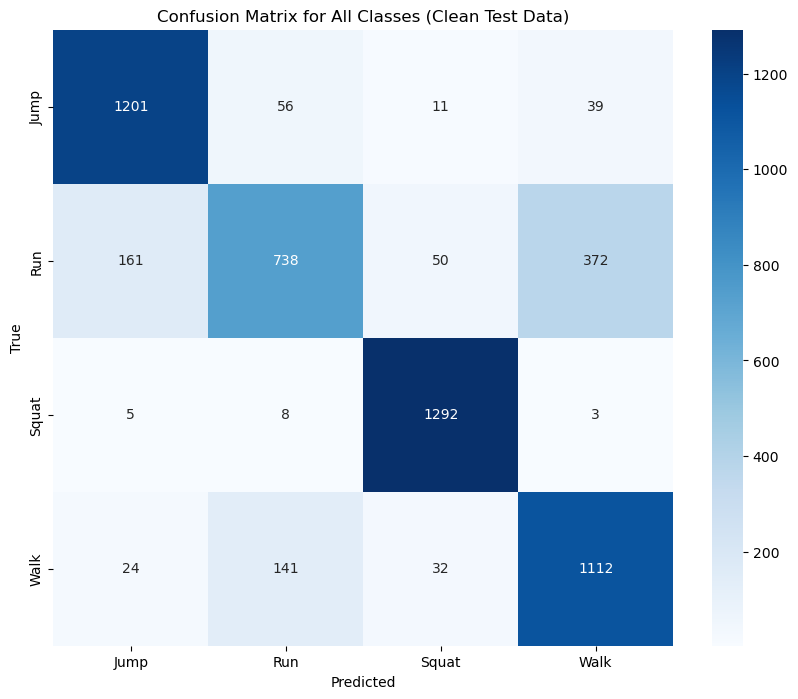

In [29]:
clean_test_accuracy_total = 0
y_test_total_test_clean = []
y_pred_total_test_clean = []

for i in range(4):
    test_df = clean_test_df_arr[i]
    X_test = clean_test_df_arr[i][['ax', 'ay', 'az', 'gx', 'gy', 'gz']]  # Feature columns
    y_test = test_df['Class']  # Label column
    X_test_scaled = scaler.transform(X_test)
    
    y_pred = final_knn.predict(X_test_scaled)
    y_test_total_test_clean.extend(y_test)
    y_pred_total_test_clean.extend(y_pred)
    
    accuracy = accuracy_score(y_test, y_pred)
    clean_test_accuracy_total = clean_test_accuracy_total + accuracy
    print(f"Test set accuracy (with normalization) for '{classes[i]}' (Clean Test Data): {accuracy}")

cm = confusion_matrix(y_test_total_test_clean, y_pred_total_test_clean)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=final_knn.classes_, yticklabels=final_knn.classes_)
plt.title('Confusion Matrix for All Classes (Clean Test Data)')
plt.xlabel('Predicted')
plt.ylabel('True')
clean_test_accuracy_total_avg = clean_test_accuracy_total / 4
print(f"Average Accuracy (Clean Test Data): {clean_test_accuracy_total_avg}")

### Calculate Accuracy for each test set (Clean Validation Data)
### Calculate confusion matrix
### Calculate Average accuracy

Test set accuracy (with normalization) for 'Jump' (Original Validation Data): 0.8157492354740061
Test set accuracy (with normalization) for 'Run' (Original Validation Data): 0.6954545454545454
Test set accuracy (with normalization) for 'Walk' (Original Validation Data): 0.8716577540106952
Test set accuracy (with normalization) for 'Squat' (Original Validation Data): 0.42048929663608564
Average Accuracy (Original Validation Data): 0.7008377078938332


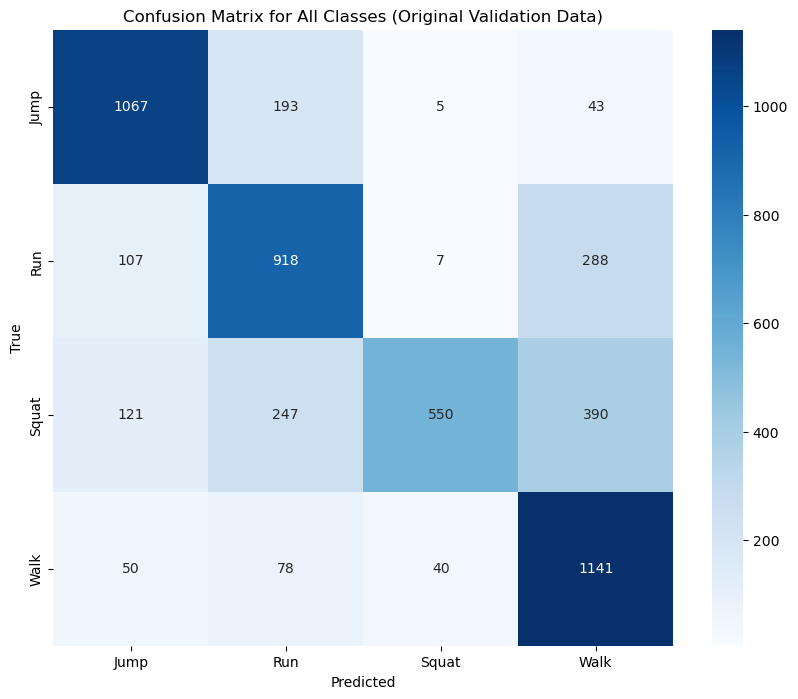

In [30]:
clean_validation_accuracy_total = 0
y_test_total_org_validation_clean = []
y_pred_total_org_validation_clean = []
for i in range(4):
    validation_df = clean_validation_df_arr[i]
    X_test = clean_validation_df_arr[i][['ax', 'ay', 'az', 'gx', 'gy', 'gz']]  # Feature columns
    y_test = validation_df['Class']  # Label column
    
    X_test_scaled = scaler.transform(X_test)
    y_pred = final_knn.predict(X_test_scaled)
    y_test_total_org_validation_clean.extend(y_test)
    y_pred_total_org_validation_clean.extend(y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    clean_validation_accuracy_total = clean_validation_accuracy_total + accuracy
    print(f"Test set accuracy (with normalization) for '{classes[i]}' (Original Validation Data): {accuracy}")
cm = confusion_matrix(y_test_total_org_validation_clean, y_pred_total_org_validation_clean)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=final_knn.classes_, yticklabels=final_knn.classes_)
plt.title('Confusion Matrix for All Classes (Original Validation Data)')
plt.xlabel('Predicted')
plt.ylabel('True')
original_validation_accuracy_avg = clean_validation_accuracy_total / 4
print(f"Average Accuracy (Original Validation Data): {original_validation_accuracy_avg}")

### Plot Accuracy vs k-value (Clean data)

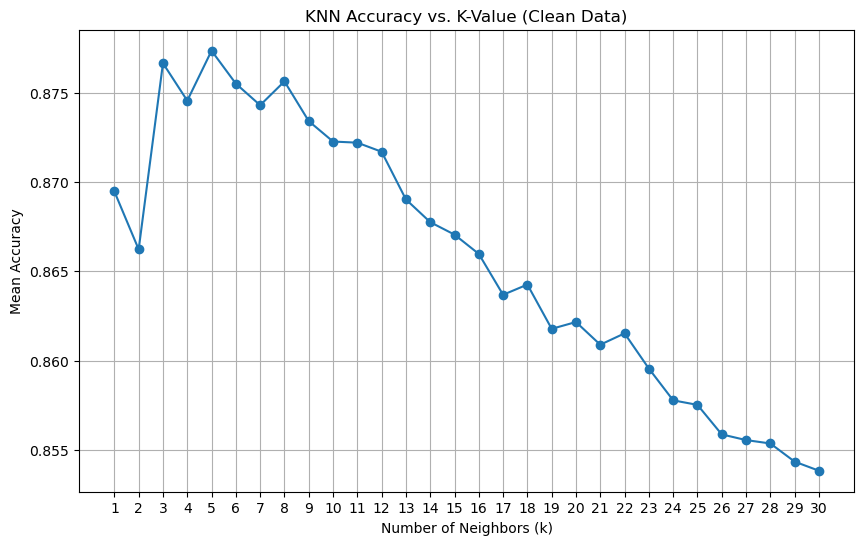

In [31]:
# Plotting the accuracy as a function of k
plt.figure(figsize=(10, 6))
plt.plot(k_values_clean, mean_scores_clean, marker='o')
plt.title('KNN Accuracy vs. K-Value (Clean Data)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Accuracy')
plt.xticks(k_values_clean)
plt.grid()
plt.show()

# Questions

### Is it needed using normalization for the decision tree classifier? Why or Why not?

No, Decision trees split data based on feature values, not distances between them. So the scale of the features does not affect how the tree partitions the data.

### Is it needed using normalization for the KNN classifier? Why or Why not?

Yes, since kNN relies on calculating distances between data points.

### Make a choice of the number of subsets that you use for your crossvalidation. Motivate your choice.

An initial model was trained with 5 crossvalidations, which resulted in a similar accuracy. A better k-value was realized with 10 crossvalidations. So 10 crossvalidations were chosen.

### Make a choice of the range of k-values you will use. Motivate your choice.

A range of 1-31 was chosen so all k-values can be tested. A low k-value could lead to overfitting the model, and a high k-value could lead to underfitting. So a range to cover all values was ideal.

### What is the optimal k-value?

Optimal K-value was 5

### What is the accuracy?

Original Data Model: 84.5%
Clean Data Model: 87.7%

### How sensitive is the performance of the model for different k-values?
The difference between the lowest and highest accuracies was ~2.5%. The k-value does not have a big impact on performance of the model in this case.

### Explain the difference between the accuracy for the validation set and the test set.

The test set had a significantly higher average accuracy. ~10% higher for Jump and Run, ~5% for Walk, and ~57% for Squat.
The big difference in the Squat was due to poor data acquisition methodology.

### Explain the result in the confusion matrix

Test set:

Jump, Squat, and Walk had very good results with good prediction of classification.

Run was mispredicted mostly as Walk. That is due to poor data acquisition methodology.

Validation set:

Walk had a great result with most of the predictions are correct.

Jump had a small number of samples being predicted as Run and Walk.

Run had a decent result but a lot of the samples were mispredicted to be Walk.

Squat gave the worst result of all. With more samples being predicted to be anything other than Squat. That is due to poor data acquisition methodology.

### Compare the results with the previous analysis

### KNN-Normalized vs KNN-Unnormalized

The model predicition accuracy was higher by ~1.5% in favor of KNN-Normalized.

When the model was tested on both the original and clean data using the test set and validation set. The Accuracy was ~1-2% better for the KNN-Unnormalized.

### KNN-Normalized vs Decision Tree

KNN-Normalized had a consistent ~5-6% higher accuracy than the decision tree model.

On the test and validation sets, the model performed significantly better. With a difference between ~5-10%.


The model predicition accuracy was the best on the KNN-normalized, but when test sets are used, KNN-unnormalized had the higher accuracy.